In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

df = pd.read_csv('/content/sample_data/07_train.csv')

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

# split target and features
X_train = train_set.drop('Premium Amount', axis=1)
y_train = train_set['Premium Amount'].copy()
X_test = test_set.drop('Premium Amount', axis=1)
y_test = test_set['Premium Amount'].copy()

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [2]:
def root_mean_squared_error(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

## Weight Decay

### Constant Weight Decay 1
- model 1: 1e-3
- model 2: 1e-4
- model 3: 1e-5
- model 4: 1e-6

In [6]:
# model 1: 1e-3
model = tf.keras.Sequential()

for i in range(5):
    model.add(tf.keras.layers.Dense(50, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization(input_shape=X_train.shape[1:]))

model.add(tf.keras.layers.Dense(1))

model.compile(
    loss=root_mean_squared_error,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, weight_decay=1e-3),
    )

n_epochs = 20
batch_size = 128

history1 = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 2.9773 - val_loss: 1.1053
Epoch 2/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 1.1093 - val_loss: 1.1008
Epoch 3/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 1.1002 - val_loss: 1.0998
Epoch 4/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 1.1004 - val_loss: 1.0987
Epoch 5/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 1.1001 - val_loss: 1.0983
Epoch 6/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 1.0981 - val_loss: 1.0975
Epoch 7/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1.0972 - val_loss: 1.0979
Epoch 8/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1.0963 - val_loss: 1.0978
Epoch 9/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 1.0956 - val_loss: 1.0968
Epoch 10/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 1.0949 - val_loss: 1.0973
Epoch 11/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1.0964 - val_loss: 1.0960
Epoch 12/20
7500/75

In [8]:
# model 2: 1e-4
model = tf.keras.Sequential()

for i in range(5):
    model.add(tf.keras.layers.Dense(50, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization(input_shape=X_train.shape[1:]))

model.add(tf.keras.layers.Dense(1))

model.compile(
    loss=root_mean_squared_error,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, weight_decay=1e-4),
    )

n_epochs = 20
batch_size = 128

history2 = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_test, y_test))

Epoch 1/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 2.7962 - val_loss: 1.1037
Epoch 2/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 1.1039 - val_loss: 1.0996
Epoch 3/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 1.1021 - val_loss: 1.0990
Epoch 4/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 1.1004 - val_loss: 1.0981
Epoch 5/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1.1000 - val_loss: 1.0976
Epoch 6/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 1.0987 - val_loss: 1.0985
Epoch 7/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 1.0992 - val_loss: 1.0973
Epoch 8/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 1.0977 - val_loss: 1.0966
Epoch 9/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 1.0962 - val_loss: 1.0985
Epoch 10/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 1.0967 - val_loss: 1.0959
Epoch 11/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 1.0969 - val_loss: 1.0959
Epoch 12/20
7500/75

In [7]:
# model 3: 1e-5
model = tf.keras.Sequential()

for i in range(5):
    model.add(tf.keras.layers.Dense(50, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization(input_shape=X_train.shape[1:]))

model.add(tf.keras.layers.Dense(1))

model.compile(
    loss=root_mean_squared_error,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, weight_decay=1e-5),
    )

n_epochs = 20
batch_size = 128

history3 = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 2.9298 - val_loss: 1.1088
Epoch 2/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1.1066 - val_loss: 1.1008
Epoch 3/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 1.1015 - val_loss: 1.0990
Epoch 4/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 1.0994 - val_loss: 1.1080
Epoch 5/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 1.0966 - val_loss: 1.0974
Epoch 6/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 1.0961 - val_loss: 1.1070
Epoch 7/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 1.0965 - val_loss: 1.0995
Epoch 8/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 1.0963 - val_loss: 1.1044
Epoch 9/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1.0950 - val_loss: 1.0956
Epoch 10/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 1.0951 - val_loss: 1.1050
Epoch 11/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1.0930 - val_loss: 1.1258
Epoch 12/20
7500/75

In [9]:
# model 4: 1e-6
model = tf.keras.Sequential()

for i in range(5):
    model.add(tf.keras.layers.Dense(50, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization(input_shape=X_train.shape[1:]))

model.add(tf.keras.layers.Dense(1))

model.compile(
    loss=root_mean_squared_error,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, weight_decay=1e-6),
    )

n_epochs = 20
batch_size = 128

history4 = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_test, y_test))

Epoch 1/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 2.9069 - val_loss: 1.1073
Epoch 2/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1.1062 - val_loss: 1.0996
Epoch 3/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 1.0997 - val_loss: 1.1002
Epoch 4/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 1.0979 - val_loss: 1.0975
Epoch 5/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 1.0975 - val_loss: 1.0981
Epoch 6/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 1.0976 - val_loss: 1.0971
Epoch 7/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 1.0974 - val_loss: 1.0970
Epoch 8/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 1.0964 - val_loss: 1.0966
Epoch 9/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 1.0968 - val_loss: 1.0977
Epoch 10/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1.0943 - val_loss: 1.0963
Epoch 11/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 1.0979 - val_loss: 1.0957
Epoch 12/20
7500/75

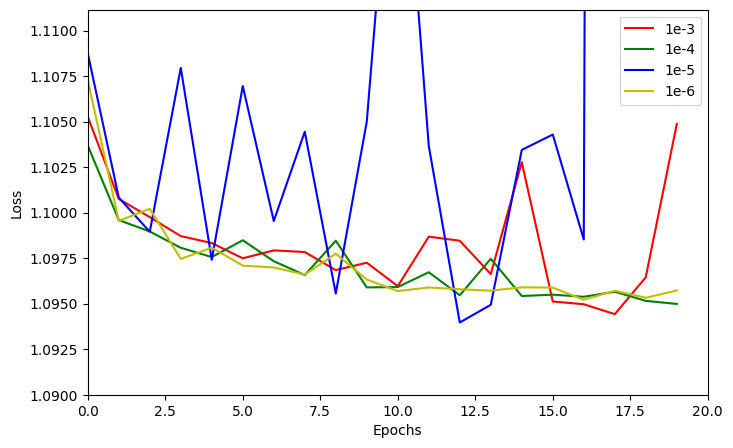

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(8, 5))

plt.plot(history1.history['val_loss'], 'r-', label='1e-3')
plt.plot(history2.history['val_loss'], 'g-', label='1e-4')
plt.plot(history3.history['val_loss'], 'b-', label='1e-5')
plt.plot(history4.history['val_loss'], 'y-', label='1e-6')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([0, 20])
plt.ylim([1.09, 1.11115])
plt.legend()
plt.show()

### Constant Weight Decay 2

- model 1: 1e-3
- model 2: 3.2e-3
- model 3: 1e-2
- model 4: 1.8e-3

LR: 0.0005

Momentum: 0.95

In [20]:
# model 1: 1e-3
model = tf.keras.Sequential()

for i in range(5):
    model.add(tf.keras.layers.Dense(50, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization(input_shape=X_train.shape[1:]))

model.add(tf.keras.layers.Dense(1))

model.compile(
    loss=root_mean_squared_error,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0005, weight_decay=1e-3, momentum=0.95),
    )

n_epochs = 20
batch_size = 128

history5 = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - loss: 1.5177 - val_loss: 1.0970
Epoch 2/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 1.0971 - val_loss: 1.0988
Epoch 3/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 1.0947 - val_loss: 1.1334
Epoch 4/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 1.0907 - val_loss: 1.1238
Epoch 5/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 1.0871 - val_loss: 1.0927
Epoch 6/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 1.0864 - val_loss: 1.0935
Epoch 7/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 1.0838 - val_loss: 1.1055
Epoch 8/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 1.0843 - val_loss: 1.1897
Epoch 9/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 1.0824 - val_loss: 1.6211
Epoch 10/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 1.0842 - val_loss: 1.0995
Epoch 11/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 1.0826 - val_loss: 1.1016
Epoch 12/20
7500/75

In [21]:
# model 2: 3.2e-3
model = tf.keras.Sequential()

for i in range(5):
    model.add(tf.keras.layers.Dense(50, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization(input_shape=X_train.shape[1:]))

model.add(tf.keras.layers.Dense(1))

model.compile(
    loss=root_mean_squared_error,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0005, weight_decay=3.2e-3, momentum=0.95),
    )

n_epochs = 20
batch_size = 128

history6 = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_test, y_test))

Epoch 1/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 1.4944 - val_loss: 1.1070
Epoch 2/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 1.0973 - val_loss: 1.1227
Epoch 3/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 1.0932 - val_loss: 1.1378
Epoch 4/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 1.0913 - val_loss: 2.1132
Epoch 5/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1.0890 - val_loss: 1.0996
Epoch 6/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 1.0866 - val_loss: 1.1001
Epoch 7/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1.0853 - val_loss: 1.1036
Epoch 8/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 1.0860 - val_loss: 2.2979
Epoch 9/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1.0847 - val_loss: 1.8425
Epoch 10/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 1.0839 - val_loss: 1.1112
Epoch 11/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1.0882 - val_loss: 1.0988
Epoch 12/20
7500/75

In [22]:
# model 3: 1e-2
model = tf.keras.Sequential()

for i in range(5):
    model.add(tf.keras.layers.Dense(50, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization(input_shape=X_train.shape[1:]))

model.add(tf.keras.layers.Dense(1))

model.compile(
    loss=root_mean_squared_error,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0005, weight_decay=1e-2, momentum=0.95),
    )

n_epochs = 20
batch_size = 128

history7 = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_test, y_test))

Epoch 1/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 1.5020 - val_loss: 1.1103
Epoch 2/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1.0954 - val_loss: 1.1069
Epoch 3/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 1.0899 - val_loss: 1.1085
Epoch 4/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 1.0858 - val_loss: 1.0910
Epoch 5/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 1.0864 - val_loss: 1.2772
Epoch 6/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1.0832 - val_loss: 1.0952
Epoch 7/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1.0859 - val_loss: 1.1012
Epoch 8/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 1.0844 - val_loss: 1.2112
Epoch 9/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 1.0839 - val_loss: 1.1891
Epoch 10/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 1.0831 - val_loss: 1.3697
Epoch 11/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1.0843 - val_loss: 1.5111
Epoch 12/20
7500/75

In [23]:
# model 4: 1.8e-3
model = tf.keras.Sequential()

for i in range(5):
    model.add(tf.keras.layers.Dense(50, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization(input_shape=X_train.shape[1:]))

model.add(tf.keras.layers.Dense(1))

model.compile(
    loss=root_mean_squared_error,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0005, weight_decay=1.8e-3, momentum=0.95),
    )

n_epochs = 20
batch_size = 128

history8 = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_test, y_test))

Epoch 1/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 1.5319 - val_loss: 1.0984
Epoch 2/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - loss: 1.0960 - val_loss: 1.1391
Epoch 3/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 1.0948 - val_loss: 1.1010
Epoch 4/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1.0873 - val_loss: 1.1104
Epoch 5/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1.0853 - val_loss: 1.1075
Epoch 6/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 1.0867 - val_loss: 1.0960
Epoch 7/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1.0840 - val_loss: 1.6102
Epoch 8/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 1.0844 - val_loss: 1.0983
Epoch 9/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 1.0851 - val_loss: 1.1012
Epoch 10/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 1.0816 - val_loss: 1.0831
Epoch 11/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 1.0817 - val_loss: 1.6328
Epoch 12/20
7500/75

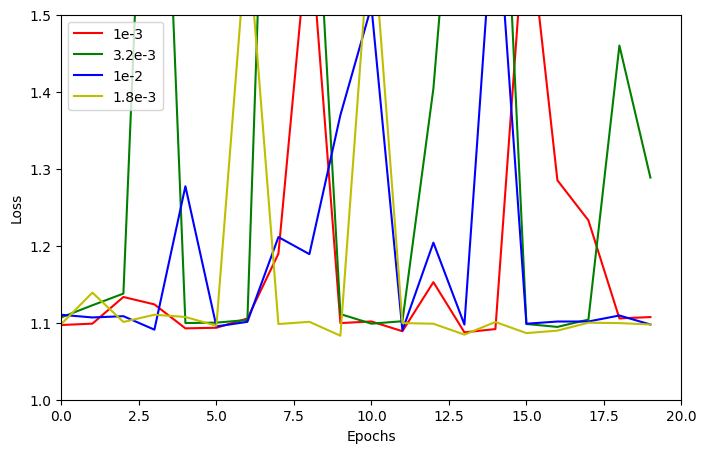

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(8, 5))

plt.plot(history5.history['val_loss'], 'r-', label='1e-3')
plt.plot(history6.history['val_loss'], 'g-', label='3.2e-3')
plt.plot(history7.history['val_loss'], 'b-', label='1e-2')
plt.plot(history8.history['val_loss'], 'y-', label='1.8e-3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([0, 20])
plt.ylim([1.0, 1.5])
plt.legend()
plt.show()